#K-Means
K-mean is a clustering algorithm that assigns data items to their nearest clusters. It requires you to specify one property, the number of clusters, usually denoted as k

The following pseudocode describes how the algorithm works:

1.   Step: Select `k` initial centroids.
2.   REPEAT:
3.   Step: Create `k` clusters by assigning each data point to the nearest cluster centroid. 
4.   Step: Recompute the new centroids for each cluster.  
5.   Until the centroids don't change. 



In [1]:
#importing lib
import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mpl_toolkits.mplot3d import axes3d

from tqdm import tqdm

# Load image
import imageio

# Set random seed so output is all same
np.random.seed(1)

In [2]:
class KMeans(object):

    def __init__(self):
        pass

    def pairwise_dist(self, x, y): 
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
                """
        xSumSquare = np.sum(np.square(x),axis=1);
        ySumSquare = np.sum(np.square(y),axis=1);
        mul = np.dot(x, y.T);
        dists = np.sqrt(abs(xSumSquare[:, np.newaxis] + ySumSquare-2*mul))
        return dists

    def _init_centers(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
        row, col = points.shape
        retArr = np.empty([K, col])
        for number in range(K):
            randIndex = np.random.randint(row)
            retArr[number] = points[randIndex]
        
        return retArr

    def _update_assignment(self, centers, points): 
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point

        Hint: You could call pairwise_dist() function.
        """
        row, col = points.shape
        cluster_idx = np.empty([row])
        distances = self.pairwise_dist(points, centers)
        cluster_idx = np.argmin(distances, axis=1)

        return cluster_idx

    def _update_centers(self, old_centers, cluster_idx, points):  
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        """
        K, D = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(K):
            new_centers[i] = np.mean(points[cluster_idx == i], axis = 0)
        return new_centers

    def _get_loss(self, centers, cluster_idx, points):  
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
        dists = self.pairwise_dist(points, centers)
        loss = 0.0
        N, D = points.shape
        for i in range(N):
            loss = loss + np.square(dists[i][cluster_idx[i]])
        
        return loss

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss

In [3]:
def find_optimal_num_clusters(self, data, max_K=15):
    """
    Plots loss values for different number of clusters in K-Means

    Args:
        image: input image of shape(H, W, 3)
        max_K: number of clusters
    Return:
        None (plot loss values against number of clusters)
    """
    y_val = np.empty(max_K)

    for i in range(max_K):
        cluster_idx, centers, y_val[i] = KMeans()(data, i + 1)

    plt.plot(np.arange(max_K) + 1, y_val)
    plt.show()
    return y_val

In [4]:
def visual_to_matrix(image_file, grays=False):
    """
    Convert .png image to matrix
    of values.
    params:
    image_file = str
    grays = Boolean
    returns:
    img = (color) np.ndarray[np.ndarray[np.ndarray[float]]]
    or (grayscale) np.ndarray[np.ndarray[float]]
    """
    img = plt.imread(image_file)
    # in case of transparency values
    if len(img.shape) == 3 and img.shape[2] > 3:
        height, width, depth = img.shape
        new_img = np.zeros([height, width, 3])
        for r in range(height):
            for c in range(width):
                new_img[r, c, :] = img[r, c, 0:3]
        img = np.copy(new_img)
    if grays and len(img.shape) == 3:
        height, width = img.shape[0:2]
        new_img = np.zeros([height, width])
        for r in range(height):
            for c in range(width):
                new_img[r, c] = img[r, c, 0]
        img = new_img
    return img

In [7]:
image_values = visual_to_matrix('build.jpeg')

r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]

# flatten the image_values
image_values = image_values.reshape(r*c,ch)

k = 6 # feel free to change this value

cluster_idx, centers, loss = KMeans()(image_values, k)
updated_image_values = np.copy(image_values)

# assign each pixel to cluster mean
for i in range(0,k):
    indices_current_cluster = np.where(cluster_idx == i)[0]
    updated_image_values[indices_current_cluster] = centers[i]
    
updated_image_values = updated_image_values.reshape(r,c,ch)


### Compare result

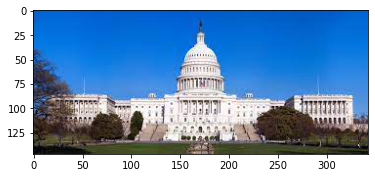

In [8]:
img = mpimg.imread('build.jpeg')
imgplot = plt.imshow(img)
plt.show()

###Result by Kmean K-means algorithm

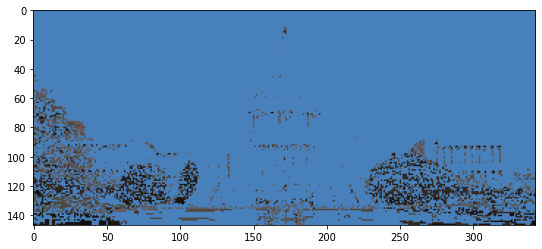

In [9]:
plt.figure(None,figsize=(9,12))
plt.imshow(updated_image_values)
plt.show()